<a href="https://colab.research.google.com/github/sai14karthik/Soft-Computing-/blob/main/AP21110010310_SC_LAB11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N. Sai Karthik AP21110010310 CSE-E




Write a python
program to realize a fuzzy rule of any popular problem (s). (Cold, medium, warm temperature problem ).

In [ ]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.3 MB/s eta 0:00:00


For a temperature of 55°C:
The comfort level is: 50.00


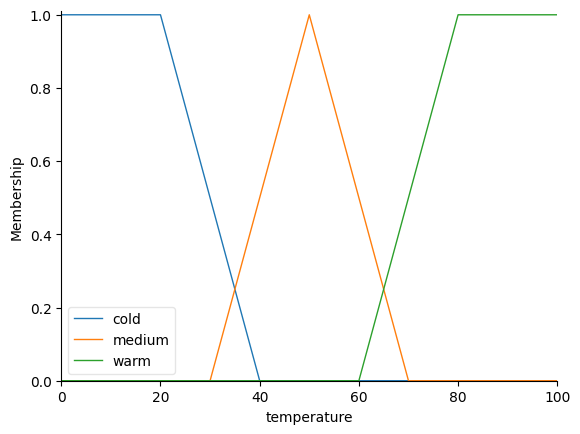

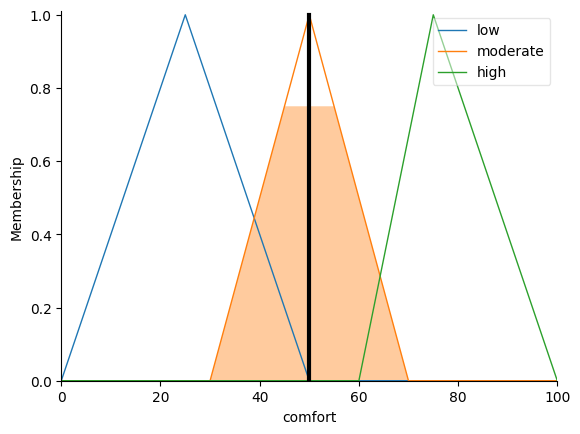

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the fuzzy variable 'temperature' and its range
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
# Define the fuzzy variable 'comfort' as the output and its range
comfort = ctrl.Consequent(np.arange(0, 101, 1), 'comfort')

# Define membership functions for temperature (cold, medium, warm)
temperature['cold'] = fuzz.trapmf(temperature.universe, [0, 0, 20, 40])
temperature['medium'] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature['warm'] = fuzz.trapmf(temperature.universe, [60, 80, 100, 100])

# Define membership functions for comfort level (low, moderate, high)
comfort['low'] = fuzz.trimf(comfort.universe, [0, 25, 50])
comfort['moderate'] = fuzz.trimf(comfort.universe, [30, 50, 70])
comfort['high'] = fuzz.trimf(comfort.universe, [60, 75, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'], comfort['low'])
rule2 = ctrl.Rule(temperature['medium'], comfort['moderate'])
rule3 = ctrl.Rule(temperature['warm'], comfort['high'])

# Create a control system with the defined rules
comfort_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
comfort_level = ctrl.ControlSystemSimulation(comfort_ctrl)

# Example: Calculate the comfort level for a specific temperature input
temp_input = 55  # Change this value to test other temperatures
comfort_level.input['temperature'] = temp_input
comfort_level.compute()

# Output the results
print(f"For a temperature of {temp_input}°C:")
print(f"The comfort level is: {comfort_level.output['comfort']:.2f}")

# Optional: Visualize the results
temperature.view()
comfort.view(sim=comfort_level)
